**Decision Trees**

1. Downloading the dataset

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')


Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [44]:
df = pd.read_csv('./weather-dataset-rattle-package/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


2. Prepare data for training and testing

In [5]:
#drop NaN rows in RainTomorrow
df.dropna(subset=['RainTomorrow','RainToday'],inplace=True)

<Axes: title={'center': 'No of rows per year'}, xlabel='Date', ylabel='count'>

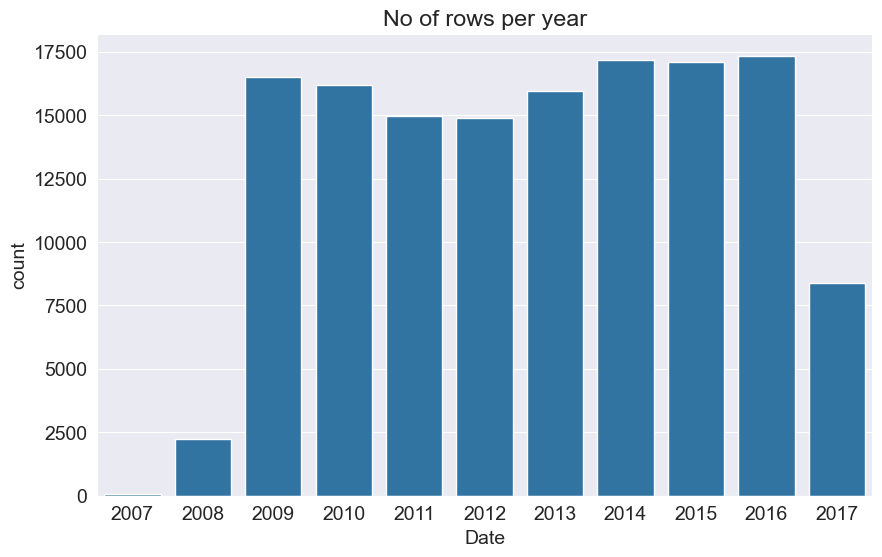

In [6]:
plt.title('No of rows per year')
sns.countplot(x=pd.to_datetime(df['Date']).dt.year)


In [7]:
# split into numerical and categorial columns
year = pd.to_datetime(df.Date).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]
print("train df shape: ", train_df.shape)
print("val df shape: ", val_df.shape)
print("test df shape: ", test_df.shape)

train df shape:  (97988, 23)
val df shape:  (17089, 23)
test df shape:  (25710, 23)


In [8]:
# split features and target column

inps = list(df.columns[1:-1])
targ = 'RainTomorrow'
train_inps = train_df[inps].copy()
train_targ = train_df[targ].copy()
val_inps = val_df[inps].copy()
val_targ = val_df[targ].copy()
test_inps = test_df[inps].copy()
test_targ = test_df[targ].copy()

In [9]:
#split into numeric and categorical columns

cat_cols = train_df[inps].select_dtypes('object').columns.to_list()
num_cols = train_df[inps].select_dtypes(include=np.number).columns.to_list()


In [10]:
cat_cols, num_cols

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'])

In [11]:
#handle missing values in numeric columns with mean
test_inps[num_cols].isna().sum()

MinTemp            120
MaxTemp             91
Rainfall             0
Evaporation      15028
Sunshine         17721
WindGustSpeed     1402
WindSpeed9am       110
WindSpeed3pm      1100
Humidity9am        253
Humidity3pm       1724
Pressure9am       2654
Pressure3pm       2661
Cloud9am         11131
Cloud3pm         13139
Temp9am             60
Temp3pm           1557
dtype: int64

In [12]:

from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(strategy='mean')
imp1.fit(df[num_cols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [13]:
train_inps[num_cols] = imp1.transform(train_inps[num_cols])
val_inps[num_cols] = imp1.transform(val_inps[num_cols])
test_inps[num_cols] = imp1.transform(test_inps[num_cols])
df[num_cols] = imp1.transform(df[num_cols])

In [14]:
test_inps[num_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [15]:
#handle missing values in categorical columns with most freq
test_inps[cat_cols].isna().sum()

Location          0
WindGustDir    1402
WindDir9am     1542
WindDir3pm     1207
RainToday         0
dtype: int64

In [16]:
imp2 = SimpleImputer(strategy='most_frequent')
imp2.fit(df[cat_cols])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [17]:
train_inps[cat_cols] = imp2.transform(train_inps[cat_cols])
val_inps[cat_cols] = imp2.transform(val_inps[cat_cols])
test_inps[cat_cols] = imp2.transform(test_inps[cat_cols])
df[cat_cols] = imp2.transform(df[cat_cols])

In [18]:
test_inps[cat_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [19]:
#scaling

from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
scal.fit(df[num_cols])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [20]:
train_inps[num_cols] = scal.transform(train_inps[num_cols])
val_inps[num_cols] = scal.transform(val_inps[num_cols])
test_inps[num_cols] = scal.transform(test_inps[num_cols])
df[num_cols] = scal.transform(df[num_cols])

In [21]:
val_inps.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [22]:
#encoding categorical data

from sklearn.preprocessing import OneHotEncoder
encd = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encd.fit(df[cat_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [23]:
encd_cols = list(encd.get_feature_names_out(cat_cols))
encd_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [24]:
train_inps[encd_cols] = encd.transform(train_inps[cat_cols])
val_inps[encd_cols] = encd.transform(val_inps[cat_cols])
test_inps[encd_cols] = encd.transform(test_inps[cat_cols])

C:\Users\FLEMIN P DANIEL\AppData\Local\Temp\ipykernel_16152\3543867081.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inps[encd_cols] = encd.transform(train_inps[cat_cols])
C:\Users\FLEMIN P DANIEL\AppData\Local\Temp\ipykernel_16152\3543867081.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inps[encd_cols] = encd.transform(train_inps[cat_cols])
C:\Users\FLEMIN P DANIEL\AppData\Local\Temp\ipykernel_16152\3543867081.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

In [25]:
test_inps

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,N,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0

In [26]:
X_train = train_inps[num_cols + encd_cols]
X_val = val_inps[num_cols + encd_cols]
X_test = test_inps[num_cols + encd_cols]

3. Training a Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
mod1 = DecisionTreeClassifier(random_state=42)
mod1.fit(X_train, train_targ)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_pred = mod1.predict(X_train)

In [29]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(97988,), dtype=object)

In [30]:
pd.value_counts(train_pred)

C:\Users\FLEMIN P DANIEL\AppData\Local\Temp\ipykernel_16152\4256379773.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_pred)


No     76192
Yes    21796
Name: count, dtype: int64

In [31]:
mod1.classes_

array(['No', 'Yes'], dtype=object)

In [32]:
accuracy_score(train_targ, train_pred)

0.9999795893374699

In [33]:
mod1.score(X_val, val_targ)

0.7930247527649366

In [34]:
val_targ.value_counts(normalize=True)

RainTomorrow
No     0.790626
Yes    0.209374
Name: proportion, dtype: float64

CPU times: total: 0 ns
Wall time: 10.5 μs


[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

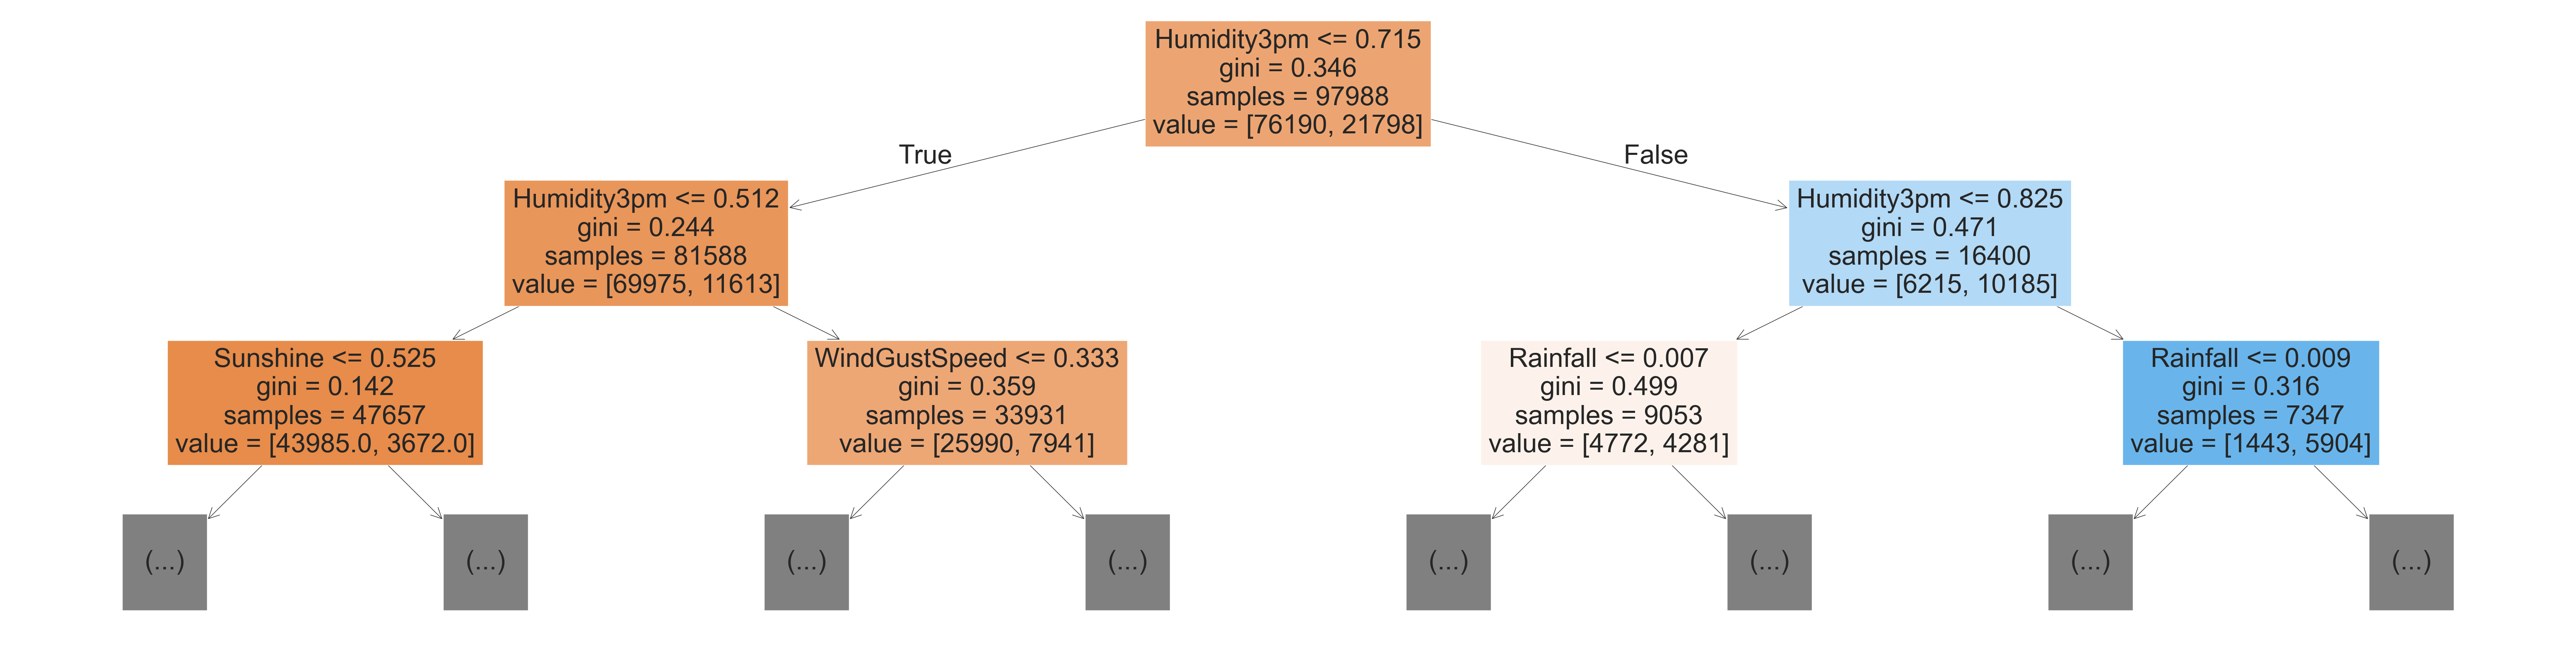

In [56]:
#plotting tree
%time
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(mod1,feature_names=list(X_train.columns),max_depth=2,filled=True)

In [58]:
tex = export_text(mod1, max_depth=5, feature_names=list(X_train.columns))
tex[0:1000]

'|--- Humidity3pm <= 0.72\n|   |--- Humidity3pm <= 0.51\n|   |   |--- Sunshine <= 0.53\n|   |   |   |--- Pressure3pm <= 0.58\n|   |   |   |   |--- Pressure3pm <= 0.44\n|   |   |   |   |   |--- Humidity3pm <= 0.24\n|   |   |   |   |   |   |--- truncated branch of depth 10\n|   |   |   |   |   |--- Humidity3pm >  0.24\n|   |   |   |   |   |   |--- truncated branch of depth 19\n|   |   |   |   |--- Pressure3pm >  0.44\n|   |   |   |   |   |--- Humidity3pm <= 0.28\n|   |   |   |   |   |   |--- truncated branch of depth 13\n|   |   |   |   |   |--- Humidity3pm >  0.28\n|   |   |   |   |   |   |--- truncated branch of depth 22\n|   |   |   |--- Pressure3pm >  0.58\n|   |   |   |   |--- Pressure3pm <= 0.69\n|   |   |   |   |   |--- WindGustSpeed <= 0.32\n|   |   |   |   |   |   |--- truncated branch of depth 24\n|   |   |   |   |   |--- WindGustSpeed >  0.32\n|   |   |   |   |   |   |--- truncated branch of depth 14\n|   |   |   |   |--- Pressure3pm >  0.69\n|   |   |   |   |   |--- Rainfall 

In [37]:
mod1.max_features_

115

In [40]:
mod1.tree_.max_depth

42

4. Feature Importances

In [46]:
mod1.feature_importances_

array([3.72012825e-02, 3.14153871e-02, 4.38202399e-02, 2.32698397e-02,
       4.76519680e-02, 6.01761997e-02, 2.72800123e-02, 2.88021458e-02,
       3.96228850e-02, 2.79572149e-01, 3.79530560e-02, 6.38952862e-02,
       1.32212780e-02, 1.69494967e-02, 3.48927045e-02, 3.37962005e-02,
       1.49770451e-03, 1.95947002e-03, 1.36446819e-03, 6.02204460e-04,
       1.38331853e-03, 1.07471797e-03, 1.16526170e-03, 1.63004564e-03,
       6.39126440e-04, 1.59778829e-03, 9.44955032e-04, 2.08269106e-03,
       1.37488479e-03, 5.34058324e-04, 7.45876802e-04, 1.36219780e-03,
       1.01959422e-04, 1.16387307e-03, 1.09040965e-03, 1.35294056e-03,
       1.10415856e-03, 1.06182351e-03, 1.19959636e-03, 1.46221238e-03,
       5.38106700e-04, 8.43664353e-04, 1.27749341e-03, 1.59384988e-03,
       1.27731506e-03, 9.21635988e-04, 6.86828425e-04, 1.51194929e-03,
       1.44981792e-03, 2.17703518e-03, 1.06410484e-03, 1.53635190e-03,
       1.20935665e-03, 2.21794076e-03, 1.15072596e-03, 2.44574465e-04,
      

In [52]:
imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': mod1.feature_importances_
}).sort_values('importance', ascending=False)

In [54]:
imp_df.head(10)

,feature,importance
9,Humidity3pm,0.279572
11,Pressure3pm,0.063895
5,WindGustSpeed,0.060176
4,Sunshine,0.047652
2,Rainfall,0.043820
8,Humidity9am,0.039623
10,Pressure9am,0.037953
0,MinTemp,0.037201
14,Temp9am,0.034893
15,Temp3pm,0.033796


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

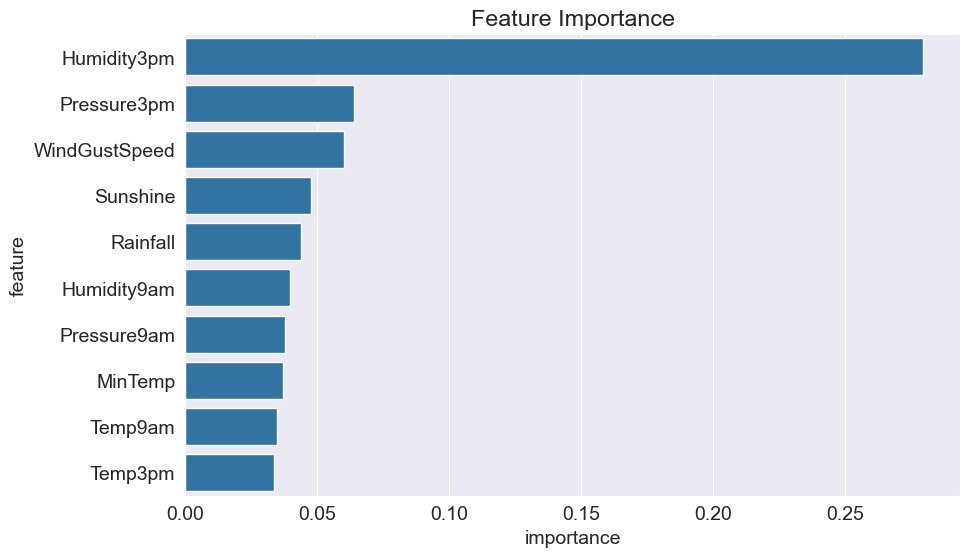

In [55]:
plt.title('Feature Importance')
sns.barplot(data=imp_df.head(10),x='importance', y='feature')

5. Hyperparameter Tuning to reduce Overfitting

In [59]:
# 1. reduce max depth of tree
mod2 = DecisionTreeClassifier(max_depth=3,random_state=42)
mod2.fit(X_train, train_targ)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [60]:
mod2.score(X_train,train_targ)

0.8315916234640977

In [61]:
mod2.score(X_val, val_targ)

0.8348060155655685

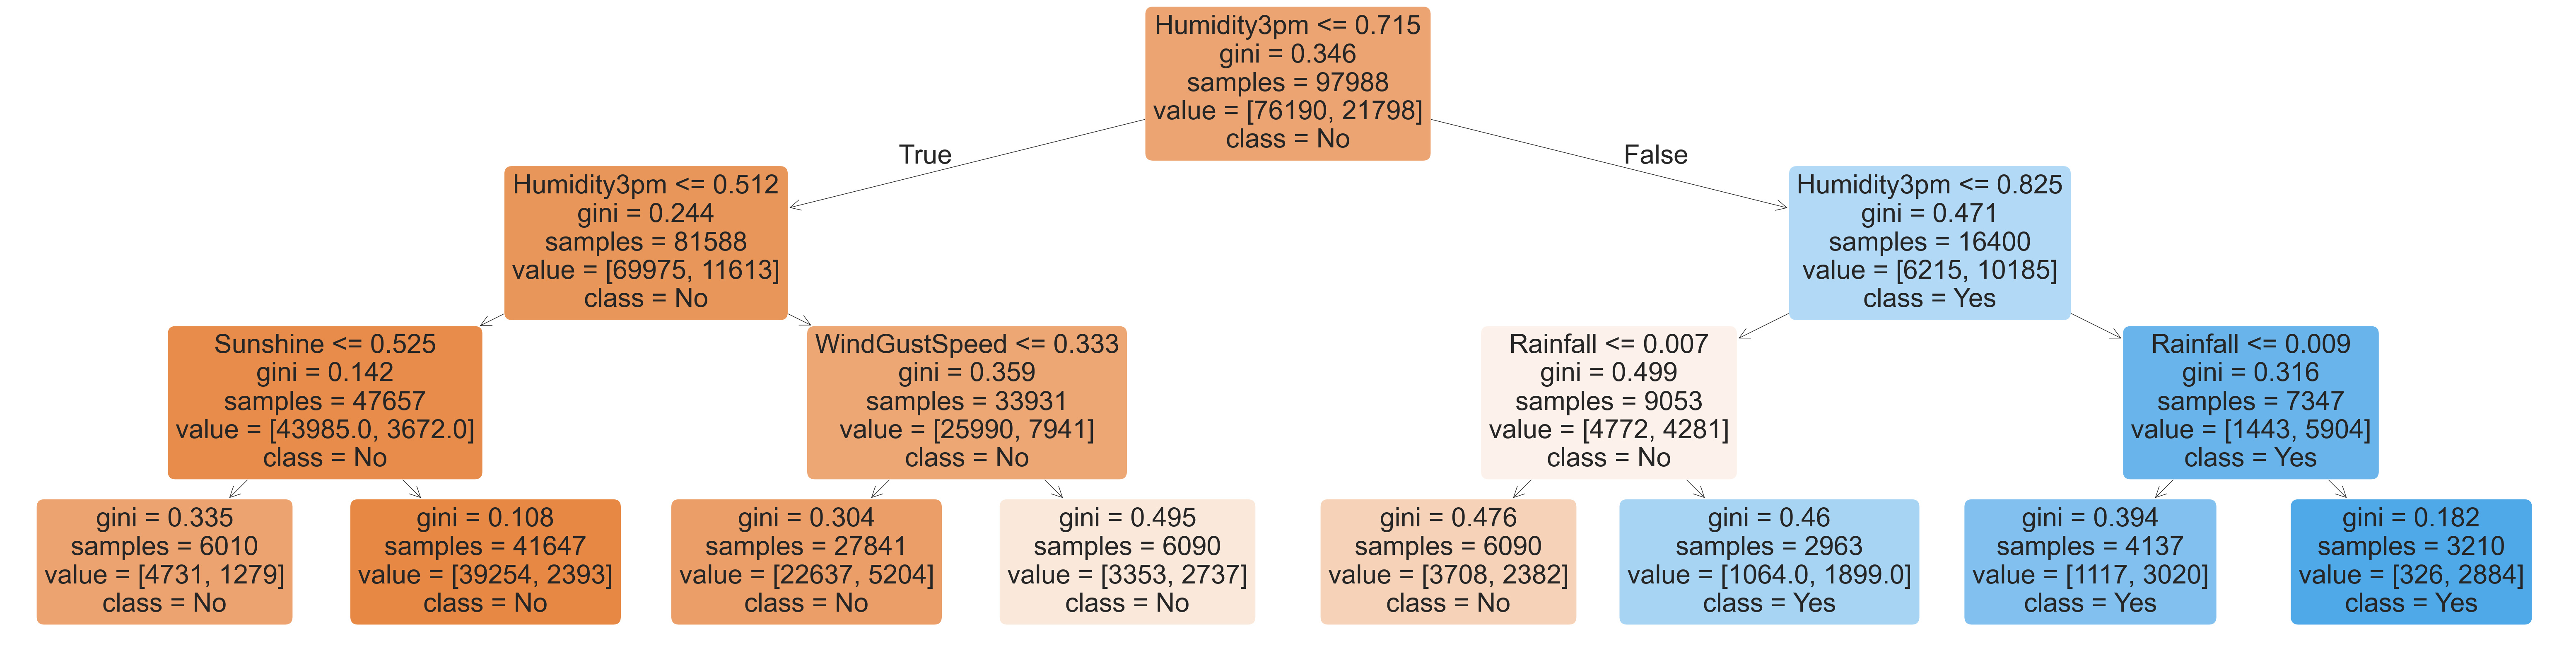

In [65]:
plt.figure(figsize=(80,20))
plot_tree(mod2, feature_names=X_train.columns, filled=True, rounded=True, class_names=mod2.classes_);

In [67]:
# 2 reduce max leaf nodes

mod3 = DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)
mod3.fit(X_train, train_targ)
mod3.score(X_train, train_targ)

0.852696248520227

In [69]:
mod3.score(X_val, val_targ)

0.8471531394464276

In [70]:
mod3.tree_.max_depth

11

In [72]:
model_text = export_text(mod3, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23